In [1]:
pip install census

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies
import requests
import pandas as pd
from census import Census

In [3]:
# Import U.S. Census API Key
from config import api_key
if api_key == "{api_key}":
    print("Please edit your config.py file.")

# Create an instance of the Census library
c = Census(
    api_key
)

In [4]:
pip install us

Note: you may need to restart the kernel to use updated packages.


In [5]:
from us import states

In [6]:
c.acs5.tables()

[{'name': 'B17015',
  'description': 'Poverty Status in the Past 12 Months of Families by Family Type by Social Security Income by Supplemental Security Income (SSI) and Cash Public Assistance Income',
  'variables': 'http://api.census.gov/data/2022/acs/acs5/groups/B17015.json',
  'universe ': 'Families'},
 {'name': 'B18104',
  'description': 'Sex by Age by Cognitive Difficulty',
  'variables': 'http://api.census.gov/data/2022/acs/acs5/groups/B18104.json',
  'universe ': 'Civilian noninstitutionalized population 5 years and over'},
 {'name': 'B17016',
  'description': 'Poverty Status in the Past 12 Months of Families by Family Type by Work Experience of Householder and Spouse',
  'variables': 'http://api.census.gov/data/2022/acs/acs5/groups/B17016.json',
  'universe ': 'Families'},
 {'name': 'B18105',
  'description': 'Sex by Age by Ambulatory Difficulty',
  'variables': 'http://api.census.gov/data/2022/acs/acs5/groups/B18105.json',
  'universe ': 'Civilian noninstitutionalized populat

In [7]:
data = c.acs5.get(
    (
        'NAME',
        "B19013_001E",
        "B01003_001E",
        "B01002_001E",
        "B19301_001E",
        "B17001_002E",
        "B25077_001E"
    ),
    {'for': 'state:{}'.format(states.CA.fips)}
)

In [8]:
west_region_states = [
    'MT',
    'WY',
    'CO',
    'ID',
    'UT',
    'NV',
    'WA',
    'OR',
    'CA',
    'AK',
    'HI'
]
data_years = [
    2018,
    2019,
    2020,
    2021,
    2022
]

In [9]:
c.acs5.state(
    (
        'NAME',
        "B19013_001E",
        "B01003_001E",
        "B01002_001E",
        "B19301_001E",
        "B17001_002E",
        "B25077_001E"
    ), states.CA.fips, year=2018)

[{'NAME': 'California',
  'B19013_001E': 71228.0,
  'B01003_001E': 39148760.0,
  'B01002_001E': 36.3,
  'B19301_001E': 35021.0,
  'B17001_002E': 5487141.0,
  'B25077_001E': 475900.0,
  'state': '06'}]

In [10]:
census_data = []
for data_year in data_years:
    for state in west_region_states:
        state_data = c.acs5.get(
            (
                'NAME',
                "B19013_001E",
                "B01003_001E",
                "B01002_001E",
                "B19301_001E",
                "B17001_002E",
                "B25077_001E"
            ),
            {'for': 'state:{}'.format(states.lookup(state).fips)},
            year=data_year
        )[0]
        state_data["Year"] = data_year
        census_data.append(state_data)
census_data

[{'NAME': 'Montana',
  'B19013_001E': 52559.0,
  'B01003_001E': 1041732.0,
  'B01002_001E': 39.8,
  'B19301_001E': 29765.0,
  'B17001_002E': 139063.0,
  'B25077_001E': 219600.0,
  'state': '30',
  'Year': 2018},
 {'NAME': 'Wyoming',
  'B19013_001E': 62268.0,
  'B01003_001E': 581836.0,
  'B01002_001E': 37.3,
  'B19301_001E': 32295.0,
  'B17001_002E': 63311.0,
  'B25077_001E': 213300.0,
  'state': '56',
  'Year': 2018},
 {'NAME': 'Colorado',
  'B19013_001E': 68811.0,
  'B01003_001E': 5531141.0,
  'B01002_001E': 36.6,
  'B19301_001E': 36415.0,
  'B17001_002E': 590504.0,
  'B25077_001E': 313600.0,
  'state': '08',
  'Year': 2018},
 {'NAME': 'Idaho',
  'B19013_001E': 53089.0,
  'B01003_001E': 1687809.0,
  'B01002_001E': 36.1,
  'B19301_001E': 26772.0,
  'B17001_002E': 228882.0,
  'B25077_001E': 192300.0,
  'state': '16',
  'Year': 2018},
 {'NAME': 'Utah',
  'B19013_001E': 68374.0,
  'B01003_001E': 3045350.0,
  'B01002_001E': 30.7,
  'B19301_001E': 28239.0,
  'B17001_002E': 309904.0,
  'B250

In [31]:
# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

# Column renaming
census_pd = census_pd.rename(
    columns = {
        "B01003_001E": "Population",
        "B01002_001E": "Median Age",
        "B19013_001E": "Household Income",
        "B19301_001E": "Per Capita Income",
        "B17001_002E": "Poverty Count",
        "B25077_001E": "Home Value",
        "NAME": "State"
    }
)

# Add a Poverty Rate column (Poverty Count / Population)
census_pd["Poverty Rate"] = 100 * census_pd["Poverty Count"].astype(int) / census_pd["Population"].astype(int)

# Configure the final DataFrame
census_pd = census_pd[
    [
        "State",
        "Year",
        "Population",
        "Median Age",
        "Household Income",
        "Home Value",
        "Per Capita Income",
        "Poverty Count",
        "Poverty Rate"
    ]
]

# Display DataFrame length and sample data
print(f"Number of rows in the DataFrame: {len(census_pd)}")
census_pd.tail(11)

Number of rows in the DataFrame: 55


,State,Year,Population,Median Age,Household Income,Home Value,Per Capita Income,Poverty Count,Poverty Rate
44,Montana,2022,1091840.0,40.1,66341.0,305700.0,37837.0,132329.0,12.119816
45,Wyoming,2022,577929.0,38.5,72495.0,269900.0,39547.0,60134.0,10.405084
46,Colorado,2022,5770790.0,37.3,87598.0,465900.0,47346.0,540105.0,9.359290
47,Idaho,2022,1854109.0,36.9,70214.0,331600.0,34919.0,198788.0,10.721484
48,Utah,2022,3283809.0,31.4,86833.0,408500.0,37023.0,275188.0,8.380146
49,Nevada,2022,3104817.0,38.5,71646.0,373800.0,37945.0,389456.0,12.543606
50,Washington,2022,7688549.0,38.0,90325.0,473400.0,48685.0,747538.0,9.722745
51,Oregon,2022,4229374.0,39.9,76632.0,423100.0,41805.0,494158.0,11.683951
52,California,2022,39356104.0,37.3,91905.0,659300.0,45591.0,4685272.0,11.904817
53,Alaska,2022,734821.0,35.3,86370.0,318000.0,42828.0,75227.0,10.237459


In [13]:
# Save the DataFrame as a CSV
# Note: To avoid any issues later, use encoding="utf-8"
census_pd.to_csv("west_census_data.csv", encoding="utf-8", index=False)

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import time
from scipy.stats import linregress

In [15]:
labels = []
medians = []
for data_year in data_years:
    labels.append(str(data_year))
    medians.append(census_pd.loc[census_pd["Year"] == data_year]["Household Income"].median())

medians

[68374.0, 71621.0, 74197.0, 79133.0, 86370.0]

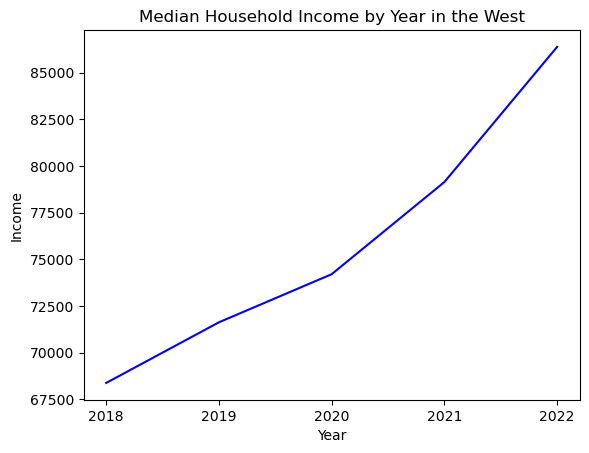

In [16]:
plt.plot(labels, medians, "b-")

# Incorporate the other graph properties
plt.title('Median Household Income by Year in the West')
plt.xlabel('Year')
plt.ylabel('Income')

# Show plot
plt.show()

In [17]:
def regressValues(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    return regress_values

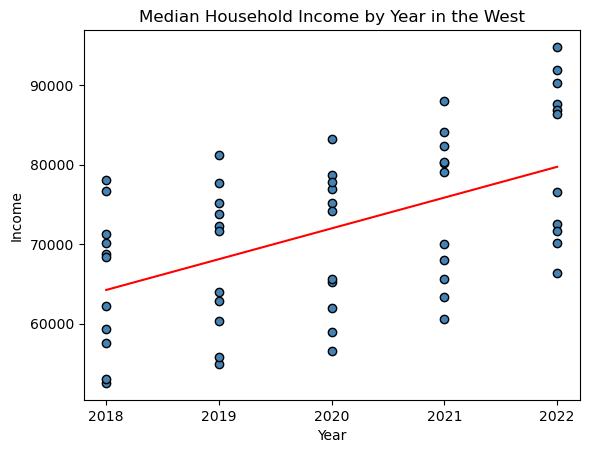

In [18]:
plt.plot(census_pd["Year"], regressValues(census_pd["Year"], census_pd["Household Income"]),"r-")
plt.scatter(census_pd["Year"], census_pd["Household Income"], marker="o", facecolors="steelblue", edgecolors="black")

# Incorporate the other graph properties
plt.title('Median Household Income by Year in the West')
plt.xlabel('Year') 
plt.xticks(ticks=[2018, 2019, 2020, 2021, 2022])
plt.ylabel('Income')

# Show plot
plt.show()

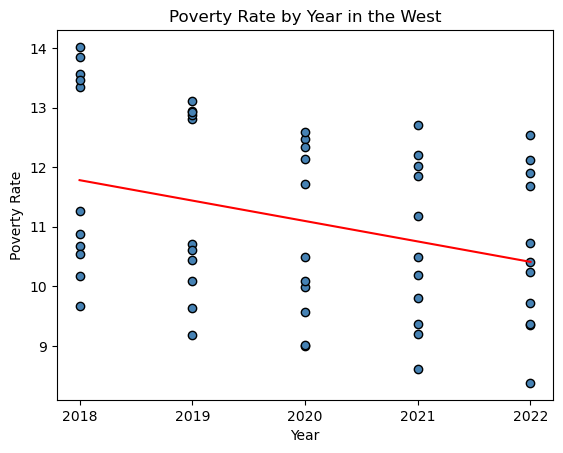

In [19]:
plt.plot(census_pd["Year"], regressValues(census_pd["Year"], census_pd["Poverty Rate"]),"r-")
plt.scatter(census_pd["Year"], census_pd["Poverty Rate"], marker="o", facecolors="steelblue", edgecolors="black")

# Incorporate the other graph properties
plt.title('Poverty Rate by Year in the West')
plt.xlabel('Year')
plt.xticks(ticks=[2018, 2019, 2020, 2021, 2022])
plt.ylabel('Poverty Rate')

# Show plot
plt.show()

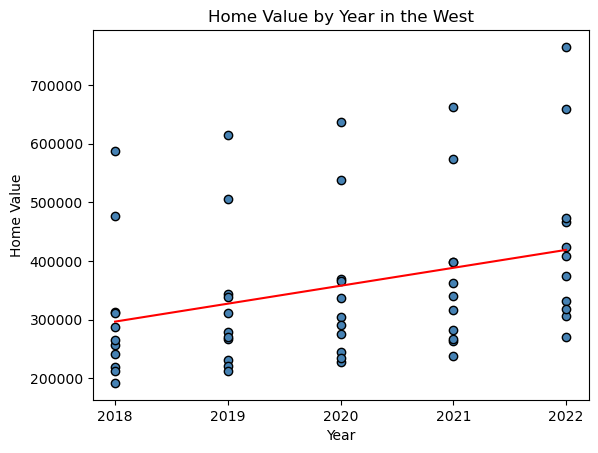

In [20]:
plt.plot(census_pd["Year"], regressValues(census_pd["Year"], census_pd["Home Value"]),"r-")
plt.scatter(census_pd["Year"], census_pd["Home Value"], marker="o", facecolors="steelblue", edgecolors="black")

# Incorporate the other graph properties
plt.title('Home Value by Year in the West')
plt.xlabel('Year')
plt.xticks(ticks=[2018, 2019, 2020, 2021, 2022])
plt.ylabel('Home Value')

# Show plot
plt.show()